In [1]:
from nilearn.datasets import fetch_abide_pcp
from nilearn import plotting
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch
import scipy 

from data.ABIDEProcessing import get_subjectIDs, fetch_filenames, \
                             get_timeseries, get_subject_connectivity, ROOT_FOLDER

from utils.visualize import visualization
from data.PhenotypicData import PhenoDataProcessing

from src.build import Adj_matrix

In [2]:
EXEC = False        # Turn to True if you download the dataset for the first time

if EXEC : 
    abide_data_dir = './data/' + 'ABIDE_dataset'       
    num_subjects = 871       # Number of subjects for the ABIDE dataset


    abide_data = fetch_abide_pcp(data_dir = abide_data_dir,
                                n_subjects = num_subjects, 
                                pipeline = 'cpac',
                                derivatives = ['rois_ho'], 
                                quality_checked = True, 
                                verbose = 1,
                                band_pass_filtering = True,
                                global_signal_regression=False)

In [3]:
# Get the subjects IDs
subjectIDs = get_subjectIDs()
# Get the filename associated to each subject
fileNames = fetch_filenames(subject_IDs = subjectIDs)

## Get the time series 
time_series = get_timeseries(subjectIDs, fileNames)

Loading time series: 100%|██████████| 871/871 [00:12<00:00, 70.42it/s] 


In [4]:
## Build the connectivity matrix for each subject
for i in tqdm(range(len(subjectIDs)), total = len(subjectIDs), desc = "Saving the connectivity matrices"):
    _ = get_subject_connectivity(time_series[i], subjectID = subjectIDs[i]) 

Saving the connectivity matrices: 100%|██████████| 871/871 [00:06<00:00, 133.72it/s]


$$ \textbf{Visualization of the Time Series and Connectivity Matrix} $$ 

We define
$Sim(S_{v}, S_{w})$ as the correlation distance between the subjects’ rs-fMRI connectivity networks after feature selection, as a separation between ASD and controls
can be observed within certain sites

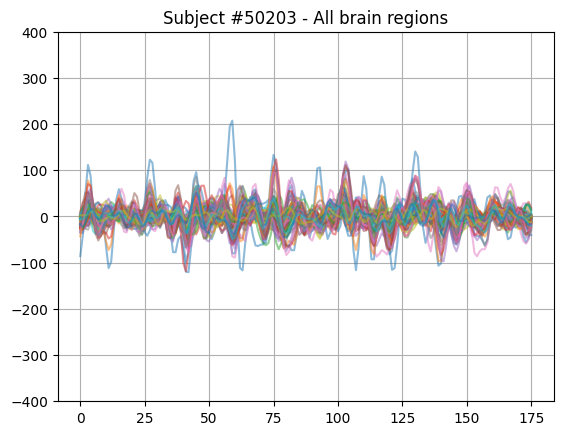

In [41]:
## Setup the visualization class
vis = visualization(subjectIDs = subjectIDs, time_series = time_series, root_folder = ROOT_FOLDER)

# Plot the time series for one subject
vis.plot_ts(idx = 120)

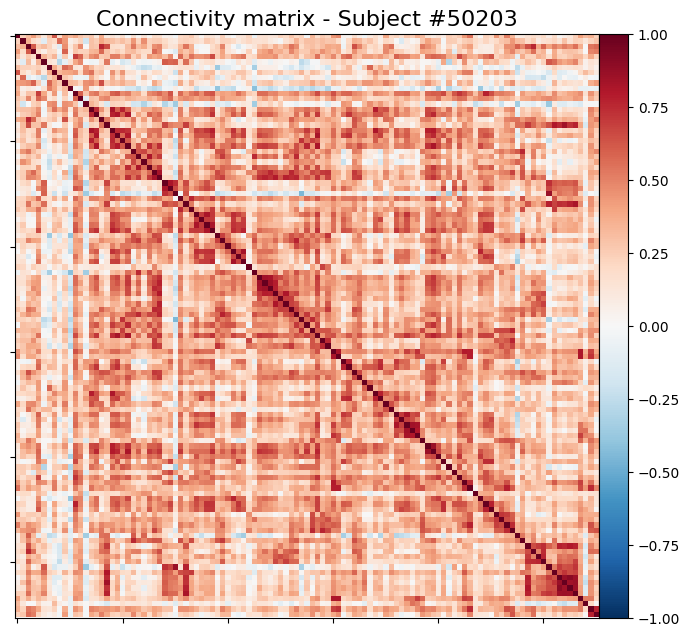

In [7]:
# Visualize the connectivity matrix for one subject
vis.plot_connectivity_matrix(idx = 120)

$$ \textbf{Phenotypic data} $$ 

In [5]:
pdp = PhenoDataProcessing(root_folder = ROOT_FOLDER)

## Extract the phenotypic Dataframe associated to the 871 studied patients
df = pdp.extract_subjects(subjectIDs = subjectIDs)

print(f"The size of the phenotypic DataFrame is {df.shape}")

## First visualization of the DataFrame
df.head()

The size of the phenotypic DataFrame is (871, 106)


Unnamed: 0.1  Unnamed: 0  SUB_ID  X  subject SITE_ID       FILE_ID  \
1             1           2   50003  2    50003    PITT  Pitt_0050003   
2             2           3   50004  3    50004    PITT  Pitt_0050004   
3             3           4   50005  4    50005    PITT  Pitt_0050005   
4             4           5   50006  5    50006    PITT  Pitt_0050006   
5             5           6   50007  6    50007    PITT  Pitt_0050007   

   DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  ...  qc_notes_rater_1 qc_anat_rater_2  \
1         1          1        24.45  ...               NaN              OK   
2         1          1        19.09  ...               NaN              OK   
3         1          1        13.73  ...               NaN              OK   
4         1          1        13.37  ...               NaN              OK   
5         1          1        17.78  ...               NaN              OK   

   qc_anat_notes_rater_2  qc_func_rater_2       qc_func_notes_rater_2  \
1                    NaN               OK                         NaN   
2                    NaN               OK                         NaN   
3                    NaN            maybe      ic-parietal-cerebellum   
4                    NaN            maybe          ic-parietal slight   
5                    NaN            maybe  ic-cerebellum_temporal_lob   

   qc_anat_rater_3 qc_anat_notes_rater_3 qc_func_rater_3  \
1               OK                   NaN              OK   
2               OK                   NaN              OK   
3               OK                   NaN              OK   
4               OK                   NaN              OK   
5               OK                   NaN              OK   

  qc_func_notes_rater_3  SUB_IN_SMP  
1                   NaN           1  
2                   NaN           1  
3                   NaN           0  
4                   NaN           1  
5                   NaN           1  

[5 rows x 106 columns]

$$ \textbf{Adjacency matrix} $$

In [8]:
adj = Adj_matrix(subjectIDs = subjectIDs, root_folder = ROOT_FOLDER, sort_var = ['SITE_ID', 'SEX'])

In [6]:
adj2 = Adj_matrix(subjectIDs = subjectIDs, root_folder = ROOT_FOLDER, sort_var = ['SITE_ID', 'SEX'], phenotypic_var=None)

In [64]:
adjacency_matrix2 = adj2.compute_adjacency_matrix(nb_features = 100)

Computing the score matrix on the phenotypic features ...


Building Score matrix: 100%|██████████| 871/871 [02:47<00:00,  5.21it/s]


DONE
Computing the correlation matrix on the similarities ...


Retrieving the connectivity matrices: 100%|██████████| 871/871 [00:02<00:00, 339.52it/s]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:73: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in self.all_networks]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:132: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  selector = selector.fit(X, Y.ravel())


Fitting estimator with 6105 features.
Fitting estimator with 6005 features.
Fitting estimator with 5905 features.
Fitting estimator with 5805 features.
Fitting estimator with 5705 features.
Fitting estimator with 5605 features.
Fitting estimator with 5505 features.
Fitting estimator with 5405 features.
Fitting estimator with 5305 features.
Fitting estimator with 5205 features.
Fitting estimator with 5105 features.
Fitting estimator with 5005 features.
Fitting estimator with 4905 features.
Fitting estimator with 4805 features.
Fitting estimator with 4705 features.
Fitting estimator with 4605 features.
Fitting estimator with 4505 features.
Fitting estimator with 4405 features.
Fitting estimator with 4305 features.
Fitting estimator with 4205 features.
Fitting estimator with 4105 features.
Fitting estimator with 4005 features.
Fitting estimator with 3905 features.
Fitting estimator with 3805 features.
Fitting estimator with 3705 features.
Fitting estimator with 3605 features.
Fitting esti

In [78]:
adjacency_matrix2_pca = adj2.compute_adjacency_matrix(nb_features = 100, method="pca")

Computing the score matrix on the phenotypic features ...


Building Score matrix: 100%|██████████| 871/871 [01:44<00:00,  8.35it/s] 


DONE
Computing the correlation matrix on the similarities ...


Retrieving the connectivity matrices: 100%|██████████| 871/871 [00:02<00:00, 327.89it/s]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:73: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in self.all_networks]


Explained variance ratio for 100 components: [0.3447057  0.02580002 0.02444557 0.01798552 0.01513665 0.0134282
 0.01093323 0.00977678 0.0096092  0.00874879 0.00822845 0.00748293
 0.00740887 0.00679368 0.00646968 0.00622759 0.0059466  0.00568299
 0.00551493 0.00542903 0.00520866 0.00497852 0.00474441 0.00459371
 0.00451506 0.00430115 0.00421546 0.00418592 0.00405184 0.00396873
 0.00388506 0.00363887 0.00363268 0.0035651  0.00350072 0.00336557
 0.00334762 0.00332991 0.00315983 0.00310568 0.00300484 0.00298559
 0.00287339 0.00280266 0.0027743  0.00270558 0.00267707 0.00264271
 0.00257589 0.00254283 0.00243634 0.00239735 0.00237111 0.00234868
 0.00234111 0.00228211 0.00226816 0.00221324 0.00217234 0.00216192
 0.00212409 0.00207574 0.00205902 0.00201743 0.00199657 0.00198403
 0.00194779 0.00193475 0.00190094 0.00189274 0.00186426 0.00185596
 0.00184605 0.00179761 0.00177509 0.00176096 0.00171707 0.00169328
 0.00167101 0.00165441 0.00164862 0.00161412 0.0015914  0.00157343
 0.001549   0.0015

In [ ]:
adjacency_matrix = adj.compute_adjacency_matrix(nb_features = 10)

Computing the score matrix on the phenotypic features ...


Building Score matrix: 100%|██████████| 871/871 [02:51<00:00,  5.07it/s]


DONE
Computing the correlation matrix on the similarities ...


Retrieving the connectivity matrices: 100%|██████████| 871/871 [00:05<00:00, 161.97it/s]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:73: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in self.all_networks]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:130: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  selector = selector.fit(X, Y.ravel())


Fitting estimator with 6105 features.
Fitting estimator with 6005 features.
Fitting estimator with 5905 features.
Fitting estimator with 5805 features.
Fitting estimator with 5705 features.
Fitting estimator with 5605 features.
Fitting estimator with 5505 features.
Fitting estimator with 5405 features.
Fitting estimator with 5305 features.
Fitting estimator with 5205 features.
Fitting estimator with 5105 features.
Fitting estimator with 5005 features.
Fitting estimator with 4905 features.
Fitting estimator with 4805 features.
Fitting estimator with 4705 features.
Fitting estimator with 4605 features.
Fitting estimator with 4505 features.
Fitting estimator with 4405 features.
Fitting estimator with 4305 features.
Fitting estimator with 4205 features.
Fitting estimator with 4105 features.
Fitting estimator with 4005 features.
Fitting estimator with 3905 features.
Fitting estimator with 3805 features.
Fitting estimator with 3705 features.
Fitting estimator with 3605 features.
Fitting esti

In [77]:
adjacency_matrix_pca = adj.compute_adjacency_matrix(nb_features = 100, method="pca")

NameError: name 'adj' is not defined

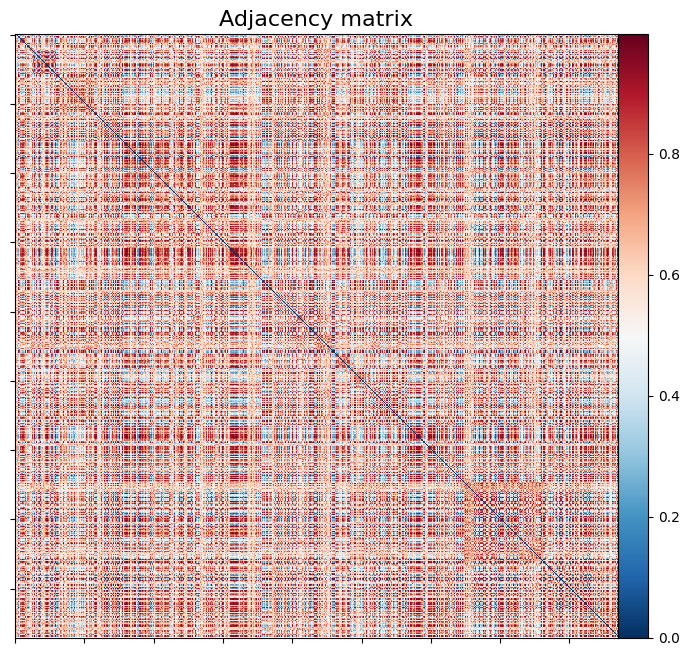

In [79]:
plotting.plot_matrix(adjacency_matrix2_pca,
                     title = "Adjacency matrix", 
                     figure = (7,7))
plt.show()

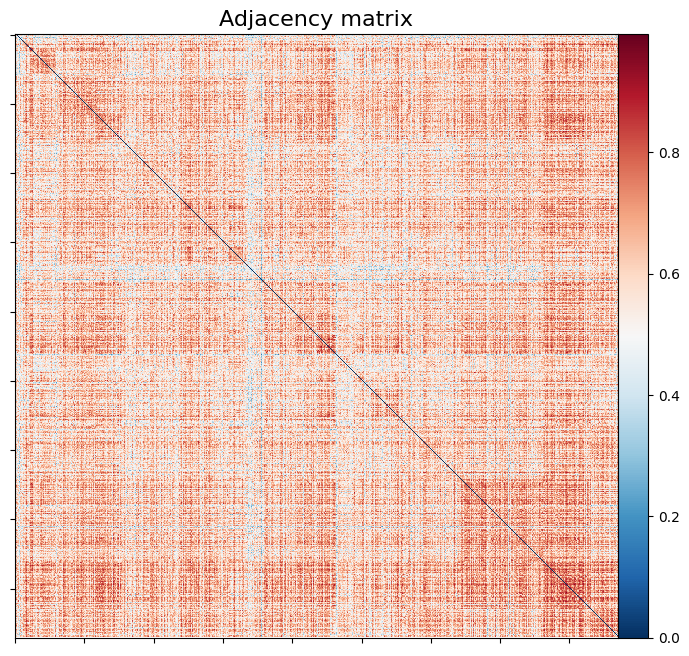

In [65]:
plotting.plot_matrix(adjacency_matrix2,
                     title = "Adjacency matrix", 
                     figure = (7,7))
plt.show()

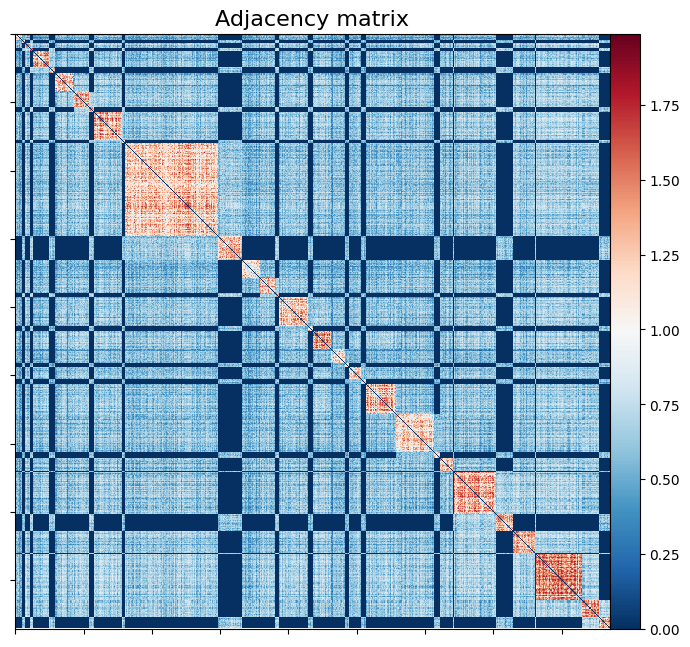

In [74]:
plotting.plot_matrix(adjacency_matrix,
                     title = "Adjacency matrix", 
                     figure = (7,7))
plt.show()

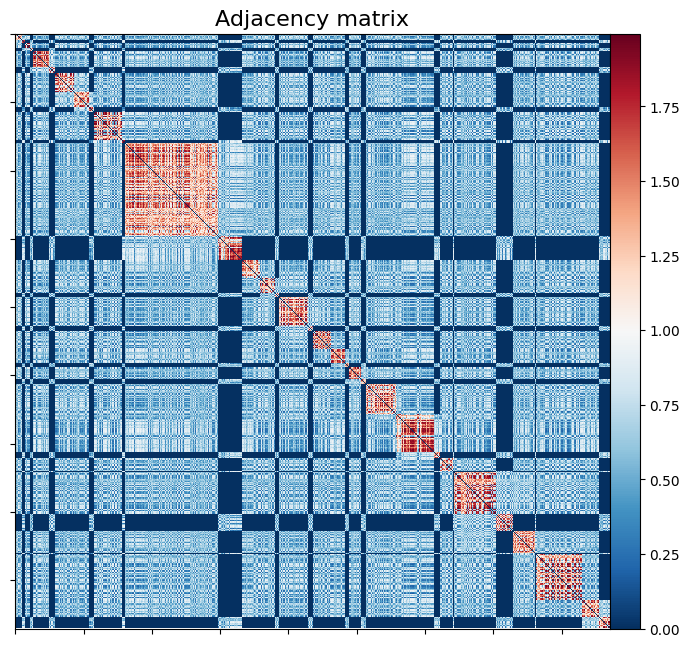

In [10]:
plotting.plot_matrix(adjacency_matrix_pca,
                     title = "Adjacency matrix", 
                     figure = (7,7))
plt.show()

La proportion de patients atteints d'autisme est de 0.4626865671641791
La proportion de patients sains est de 0.5373134328358209


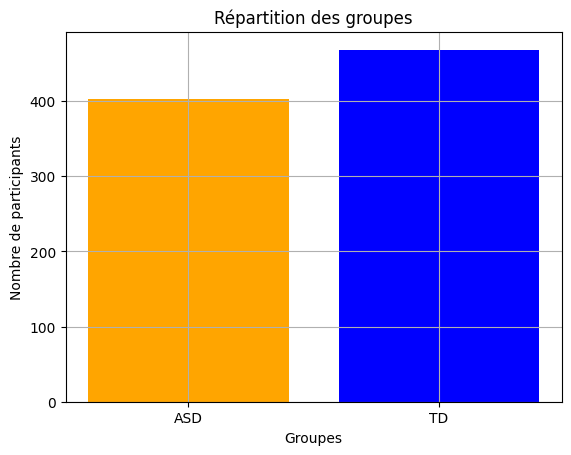

In [12]:
## Comparaison de la répartition des classes (sujets sain et malades)
# DX_GROUP = 1 : Patient atteint d'autisme
# DX_GROUP = 2 : Patient sain
count = df['DX_GROUP'].value_counts()

print(f"La proportion de patients atteints d'autisme est de {count[1]/sum(count)}")
print(f"La proportion de patients sains est de {count[2]/sum(count)}")

plt.bar(count.index, count.values, color=['blue', 'orange'], tick_label=['TD', 'ASD'])
plt.xlabel('Groupes')
plt.ylabel('Nombre de participants')
plt.grid()
plt.title('Répartition des groupes')
plt.show()

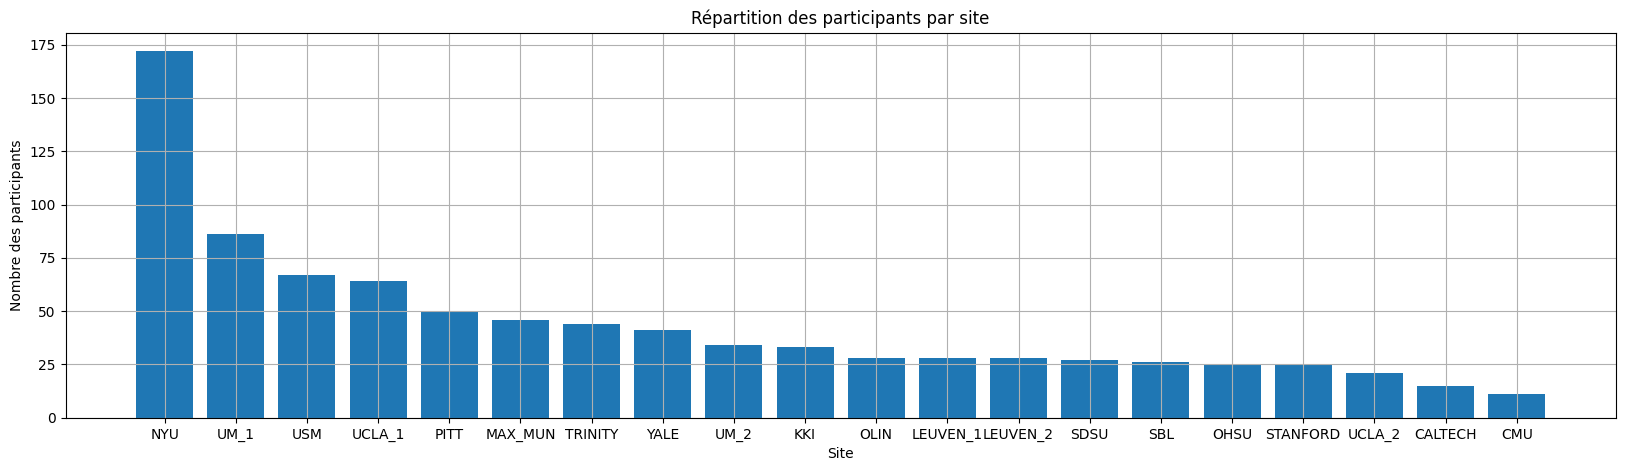

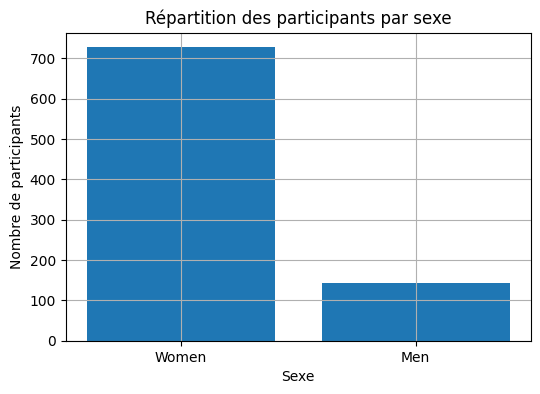

In [13]:
## Réparition des sexes et des sites
count_sex = df['SEX'].value_counts()
count_site = df['SITE_ID'].value_counts()

plt.figure(figsize=(20,5))
plt.bar(count_site.index, count_site.values)
plt.xlabel('Site')
plt.ylabel('Nombre des participants')
plt.grid()
plt.title('Répartition des participants par site')
plt.show()

plt.figure(figsize = (6, 4))
plt.bar(count_sex.index, count_sex.values, tick_label = ['Women', 'Men'])
plt.xlabel('Sexe')
plt.ylabel('Nombre de participants')
plt.grid()
plt.title('Répartition des participants par sexe')
plt.show()

$$ \textbf{Création des ensembles d'entrainement, validation et test} $$ 

In [9]:
from src.gcn import ChebGCN
from src.config import general_settings
from src.pipeline import DataPipeline, TrainTestPipeline

In [11]:
args = general_settings()
data_pipe = DataPipeline(args)

feature_vector = adj2.get_feature_vectors()
feature_vector_pca = adj2.feature_selection(feature_vector, 100, method="pca")

feature_vector_rfe = adj2.feature_selection(feature_vector, 100, method="rfe")

Retrieving the connectivity matrices: 100%|██████████| 871/871 [00:03<00:00, 219.22it/s]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:73: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in self.all_networks]


Explained variance ratio for 100 components: [0.3447057  0.02580002 0.02444557 0.01798552 0.01513665 0.0134282
 0.01093323 0.00977678 0.0096092  0.00874879 0.00822845 0.00748293
 0.00740887 0.00679368 0.00646968 0.0062276  0.0059466  0.00568299
 0.00551493 0.00542902 0.00520866 0.00497852 0.00474442 0.00459369
 0.00451508 0.00430113 0.00421542 0.00418592 0.00405185 0.0039687
 0.00388494 0.00363884 0.00363268 0.00356519 0.00350054 0.00336556
 0.00334734 0.0033297  0.00315997 0.00310573 0.00300488 0.00298521
 0.00287358 0.00280259 0.00277451 0.002705   0.00267646 0.00264297
 0.00257667 0.002543   0.00243583 0.00239656 0.00237175 0.00234715
 0.00234154 0.00228094 0.00226748 0.00221379 0.00216815 0.00216262
 0.002129   0.00207449 0.00205672 0.00201894 0.00199969 0.00198357
 0.0019515  0.00193094 0.00189723 0.00188245 0.00186948 0.00185948
 0.00184247 0.00181041 0.00177646 0.00174923 0.00172026 0.00169051
 0.00166334 0.00165426 0.00164537 0.0016185  0.0015848  0.00157274
 0.00156552 0.00153

c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:132: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  selector = selector.fit(X, Y.ravel())


Fitting estimator with 6105 features.
Fitting estimator with 6005 features.
Fitting estimator with 5905 features.
Fitting estimator with 5805 features.
Fitting estimator with 5705 features.
Fitting estimator with 5605 features.
Fitting estimator with 5505 features.
Fitting estimator with 5405 features.
Fitting estimator with 5305 features.
Fitting estimator with 5205 features.
Fitting estimator with 5105 features.
Fitting estimator with 5005 features.
Fitting estimator with 4905 features.
Fitting estimator with 4805 features.
Fitting estimator with 4705 features.
Fitting estimator with 4605 features.
Fitting estimator with 4505 features.
Fitting estimator with 4405 features.
Fitting estimator with 4305 features.
Fitting estimator with 4205 features.
Fitting estimator with 4105 features.
Fitting estimator with 4005 features.
Fitting estimator with 3905 features.
Fitting estimator with 3805 features.
Fitting estimator with 3705 features.
Fitting estimator with 3605 features.
Fitting esti

In [97]:
data_dict = data_pipe.build_data_dict(df, feature_vector_rfe, adjacency_matrix2)

In [67]:
import torch
import torch.nn as nn
import numpy as np
from utils.preprocess import preprocess_features
from tqdm import tqdm
import torch.nn.functional as func
import os

In [98]:
input_dim = 100

In [99]:
chebgcn = ChebGCN(args, in_features = input_dim, out_features = 1, adjacency_matrix = data_dict["adjacency_matrix"])

args.hidden_dim = 20
args.num_layers = 5
args.dropout_rate = 0.4
args.n_epoch = 300
Train_test_pipe = TrainTestPipeline(args, data_dict, chebgcn, "chebGCN.pt", ROOT_FOLDER)

In [100]:
trainLoss, train_accuracy, valLoss, valAccuracy = Train_test_pipe.NNTrainMiniBatch(128)

Epoch 0 | Train Loss : 0.712013304233551 | Validation Loss : 0.7153867483139038 | Validation accuracy : 0.4597701132297516
Epoch 1 | Train Loss : 0.727450966835022 | Validation Loss : 0.7095498442649841 | Validation accuracy : 0.4712643623352051
Epoch 2 | Train Loss : 0.7298271656036377 | Validation Loss : 0.7059386968612671 | Validation accuracy : 0.4482758641242981
Epoch 3 | Train Loss : 0.697954535484314 | Validation Loss : 0.7046138644218445 | Validation accuracy : 0.37931033968925476
Epoch 4 | Train Loss : 0.7103647589683533 | Validation Loss : 0.7047765254974365 | Validation accuracy : 0.4367816150188446
Epoch 5 | Train Loss : 0.711265504360199 | Validation Loss : 0.7050843238830566 | Validation accuracy : 0.48275861144065857
Epoch 6 | Train Loss : 0.6710122227668762 | Validation Loss : 0.7053021192550659 | Validation accuracy : 0.4712643623352051
Epoch 7 | Train Loss : 0.6801221370697021 | Validation Loss : 0.7054540514945984 | Validation accuracy : 0.4712643623352051
Epoch 8 | 

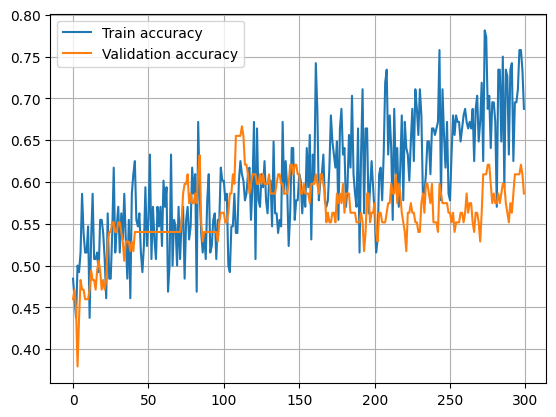

In [101]:
plt.plot(train_accuracy, label = "Train accuracy")
plt.plot(valAccuracy, label = 'Validation accuracy')
plt.legend()
plt.grid()
plt.show()

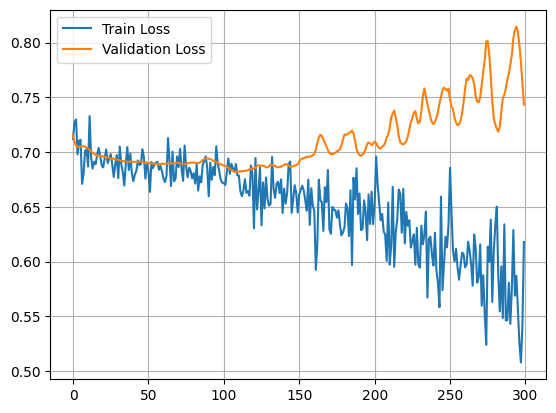

In [102]:
plt.plot(trainLoss, label = 'Train Loss')
plt.plot(valLoss, label = 'Validation Loss')
plt.legend()
plt.grid()
plt.show()
